<a href="https://colab.research.google.com/github/imahrukh/AI2002/blob/main/labs/lab11/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    precision_score, recall_score, f1_score, roc_auc_score,
    mean_squared_error, mean_absolute_error, r2_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import numpy as np



In [3]:
# 1. Load Dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [4]:
# 2. Preprocess
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
# Convert to torch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [6]:
# 3. FCNN model
class FCNN(nn.Module):
    def __init__(self, input_dim):
        super(FCNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)

model = FCNN(X.shape[1])

In [7]:
# 4. Train Model
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
epochs = 100

for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()


In [8]:
# 5. Evaluation
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    predictions_label = (predictions > 0.5).astype(int)

# Metrics
precision = precision_score(y_test, predictions_label)
recall = recall_score(y_test, predictions_label)
f1 = f1_score(y_test, predictions_label)
roc = roc_auc_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"ROC AUC: {roc:.4f}")
print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")



Precision: 0.9859
Recall: 0.9859
F1-Score: 0.9859
ROC AUC: 0.9987
MSE: 0.0203
MAE: 0.0775
R²: 0.9136


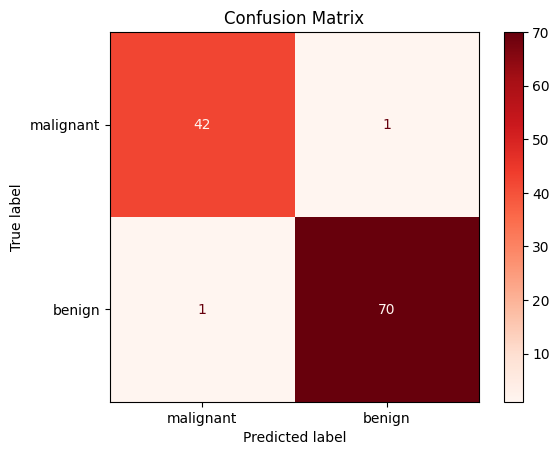

In [9]:
# 6. Plot Confusion Matrix
cm = confusion_matrix(y_test, predictions_label)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

Your Task:

* - Choose Any dataset (Binary Classification)  
* - Load Dataset
* - Use the Fully connected NN you designed in the 2nd Last Lab
* - Train your FCNN on that dataset
* - Do the evluation useing Precision, Recall, F-Measure, ROC, R2, MSE, MAE
* - Plot a confusion Metric
